<a href="https://colab.research.google.com/github/Omarouteix/PUC/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO 2**

1) - Crea un nuevo fichero y simula el código anterior con una imagen en color y otra en escala de grises.

2) - Guarda tu código en un repositorio gitHub y compártelo a tu profesor.

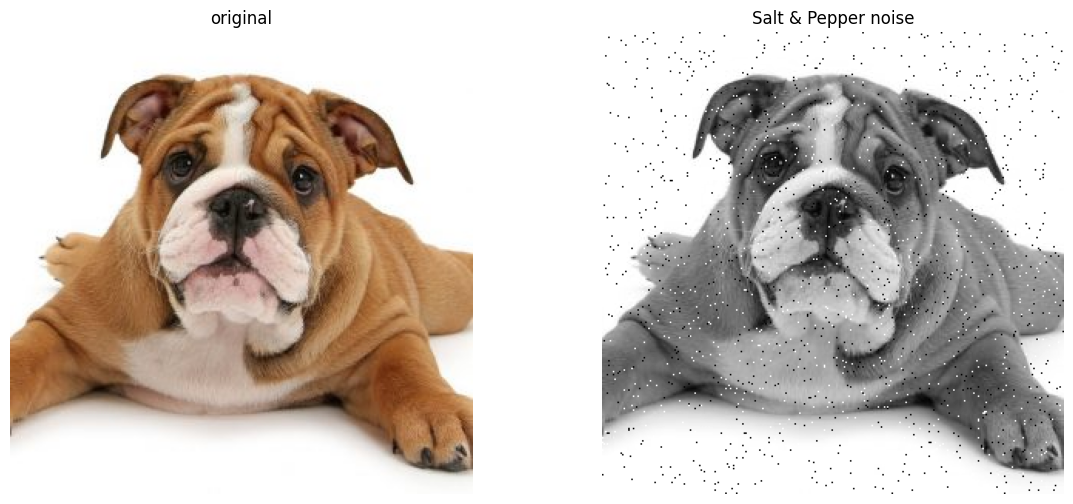

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte
import skimage as sk
#import skimage.io as skio # fixed here sk.io in line 5


img =sk.io.imread( '/content/dog_image.jpg')
gray_img = rgb2gray(img)
## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
# noise should have the same shape as the image you're applying it to
noise = np.random.random(gray_img.shape[:2]) # Generate noise with shape (height, width)
noisy_image = img_as_ubyte(gray_img.copy()) # use 'img' here instead of 'data.camera()'
#noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')

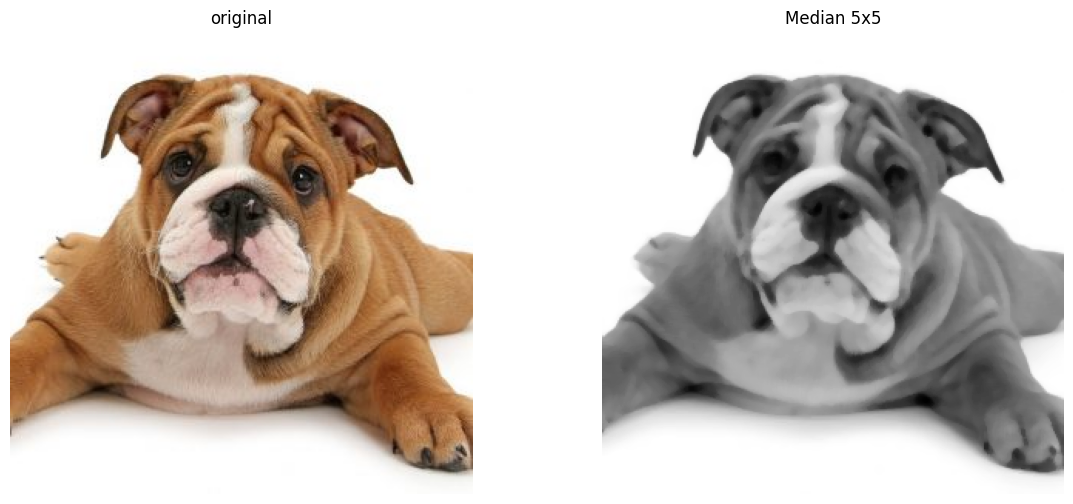

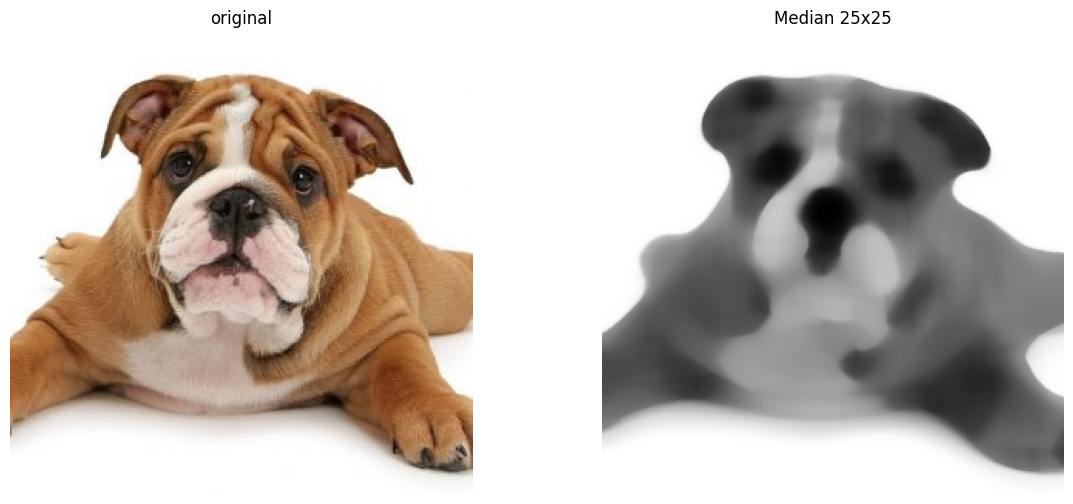

In [11]:
from skimage.morphology import disk, square, ball
from skimage.filters import median
from skimage.color import rgb2gray # Import rgb2gray


sel5 = square(5)
img_med5x5 = median(gray_img, sel5)  # Use gray_img here

plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')


sel25 = square(25)

img_med25x25 = median(rgb2gray(img), sel25)  # Convert img to grayscale before applying median filter


plot_comparison(img,img_med25x25,'Median 25x25')

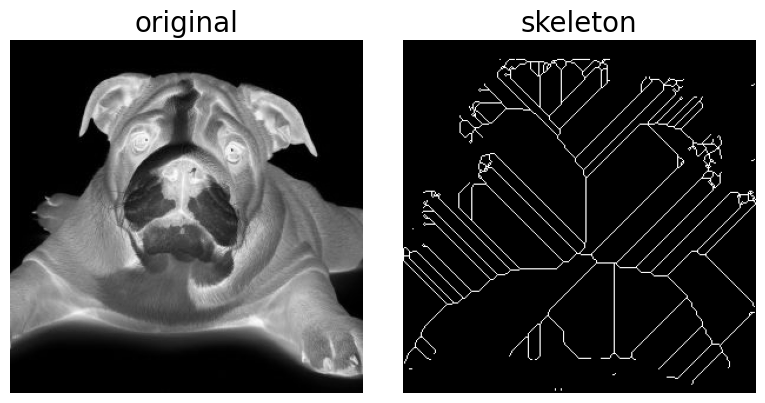

In [13]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert


image = invert(gray_img)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()